In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('SalaryGender.csv')

In [2]:
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [3]:
type(df['Salary'])

## Note : Each coln data from Pandas Df is always a SERIES

pandas.core.series.Series

In [4]:
df['Salary'][0].dtype

dtype('float64')

In [5]:
## reading all coln data ( ie SERIES data )  as a numpy array

salary = np.array(df['Salary'])
gender = np.array(df['Gender'])
phd = np.array(df['PhD'])
age = np.array(df['Age'])

In [6]:
print(salary)

[140.    30.    35.1   30.    80.    30.    60.    31.1  125.    51.
   3.    46.   150.     3.   130.    15.   130.    84.   190.    74.
  73.    10.    50.     7.     9.5   15.2   28.6   20.    72.    81.
 100.    90.    90.    35.    30.    25.    52.     9.    63.    72.
  16.    92.   106.     2.5    9.    32.    32.    55.    52.    28.
  20.    14.7   22.3   34.8   84.    19.   160.    65.    55.     4.6
 102.    20.    62.    55.    45.6   40.    24.    35.    48.    20.
  40.7   15.     0.25 152.    39.8   12.    30.   120.     1.7   36.
  96.    38.    90.     9.    25.8   22.    38.8   72.    89.    41.
  89.    25.    52.   115.    66.    18.6  152.     1.8   35.     4.  ]


In [7]:
print(df)

    Salary  Gender  Age  PhD
0    140.0       1   47    1
1     30.0       0   65    1
2     35.1       0   56    0
3     30.0       1   23    0
4     80.0       0   53    1
..     ...     ...  ...  ...
95    18.6       1   26    0
96   152.0       1   56    1
97     1.8       1   28    0
98    35.0       0   44    0
99     4.0       0   24    0

[100 rows x 4 columns]


### iloc ( implicit Indexing)  and Slicing Practice

In [8]:
## to print rows 10 to 16 
df.iloc[ 10:16 ]

,Salary,Gender,Age,PhD
10,3.0,1,22,0
11,46.0,1,59,0
12,150.0,1,60,1
13,3.0,1,28,0
14,130.0,1,65,0
15,15.0,0,25,0


In [9]:
## to print rows 10 to 15 and Colns 1 to 2
df.iloc[10:16,0:2]

,Salary,Gender
10,3.0,1
11,46.0,1
12,150.0,1
13,3.0,1
14,130.0,1
15,15.0,0


In [10]:
## print all rows and only 2 columns - Gender & Age 
df.iloc[0:,1:3]

,Gender,Age
0,1,47
1,0,65
2,0,56
3,1,23
4,0,53
...,...,...
95,1,26
96,1,56
97,1,28
98,0,44


In [11]:
## Can we print rows 10 to 15 and only last 2 columns
df.iloc[10:16:,-2:]

,Age,PhD
10,22,0
11,59,0
12,60,1
13,28,0
14,65,0
15,25,0


### unique , values , mean , median & mode - practice 

In [12]:
## Seems their are only 2 values for PHD.To check 
df['PhD'].unique()

array([1, 0], dtype=int64)

In [13]:
## To see first few values of age
df['Age'].values[:6]

array([47, 65, 56, 23, 53, 27], dtype=int64)

In [14]:
## The mean Age of employees 
df['Age'].mean()

46.88

In [15]:
## The median Age of employees 
df['Age'].median()

49.0

In [16]:
## The most common Ages of employees
df['Age'].mode()  

## their can be multiple modes.

0    60
1    65
dtype: int64

In [17]:
## Difference between mode(axis=0) and mode(axis=1)

df1 = pd.DataFrame({"A":[14,4,5,4,1],
                 "B":[5,2,54,3,2],
                 "C":[20,20,7,3,8],
                 "D":[14,3,6,2,6]})
  
# Print the dataframe
print(df1)

## find mode 
df1.mode()   ## df.mode(axis = 0) is default

    A   B   C   D
0  14   5  20  14
1   4   2  20   3
2   5  54   7   6
3   4   3   3   2
4   1   2   8   6


,A,B,C,D
0,4,2,20,6


In [18]:
df1.mode(axis = 1)  ## seems 14 and 3 are modes in the 0th and 3rd row resp

,0,1,2,3
0,14.0,NaN,NaN,NaN
1,2.0,3.0,4.0,20.0
2,5.0,6.0,7.0,54.0
3,3.0,NaN,NaN,NaN
4,1.0,2.0,6.0,8.0


### Is their any correlation between age and salary ?

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Salary'),
  Text(1.5, 0, 'Gender'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'PhD')])

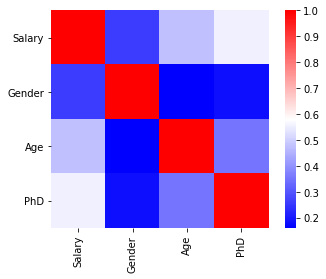

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

coorelations = df.corr()

sns.heatmap(data = coorelations, square=True, cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
## Anything above 50% is considered a good correlation
## Therefore, Salary and Phd have a pretty good correleation between them.

In [21]:
# Note: If two dependant variables or features have a correlation, then one of the two variables can be dropped

In [22]:
# In this dataset, Gender and Age has nothing to do with phD, therefore we drop the two columns

df=df.drop(["Gender"],axis=1)
df

,Salary,Age,PhD
0,140.0,47,1
1,30.0,65,1
2,35.1,56,0
3,30.0,23,0
4,80.0,53,1
...,...,...,...
95,18.6,26,0
96,152.0,56,1
97,1.8,28,0
98,35.0,44,0


In [23]:
x=df.drop(["PhD"],axis=1)
x

,Salary,Age
0,140.0,47
1,30.0,65
2,35.1,56
3,30.0,23
4,80.0,53
...,...,...
95,18.6,26
96,152.0,56
97,1.8,28
98,35.0,44


In [24]:
y=df["PhD"]
y

0     1
1     1
2     0
3     0
4     1
     ..
95    0
96    1
97    0
98    0
99    0
Name: PhD, Length: 100, dtype: int64

In [25]:
# Dividing the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [27]:
# Further we can apply Logistic Regression and make our model to predict whether they are a PhD holder or not with respect to their salary